# Project 2 TAA

## Expression Recognition with Keras

### Load datasets from file

In [26]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for neural network
import tensorflow as tf
from tensorflow import keras

# Show images
from PIL import Image
import os

In [46]:
labelNames = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

# Load Training data cropped
mat=loadmat(f"./datasets/crop/train/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X_crop, y_crop = mat["X"], mat["y"]

# Load Training data not cropped
mat=loadmat(f"./datasets/no_crop/train/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X_nocrop, y_nocrop = mat["X"], mat["y"]

In [47]:
# numbers
m_crop = X_crop.shape[0] # number of training examples
m_nocrop = X_nocrop.shape[0]
labels = np.max(y_crop)+1 # number of labels
features = X_crop.shape[1:] # number of features per example

print(f"Loaded {m_crop} traing examples cropped and {m_nocrop} no cropped with {labels} labels ({int(m/labels)} for each), each with {features} features (pixels).")
print("Labels are:", ', '.join(labelNames))

print(f"Loaded {X.shape[0]} dev examples.")

Loaded 9600 traing examples cropped and 9600 no cropped with 8 labels (1200 for each), each with (150, 150) features (pixels).
Labels are: Neutral, Happy, Sad, Surprise, Fear, Disgust, Anger, Contempt
Loaded 9600 dev examples.


### Some examples

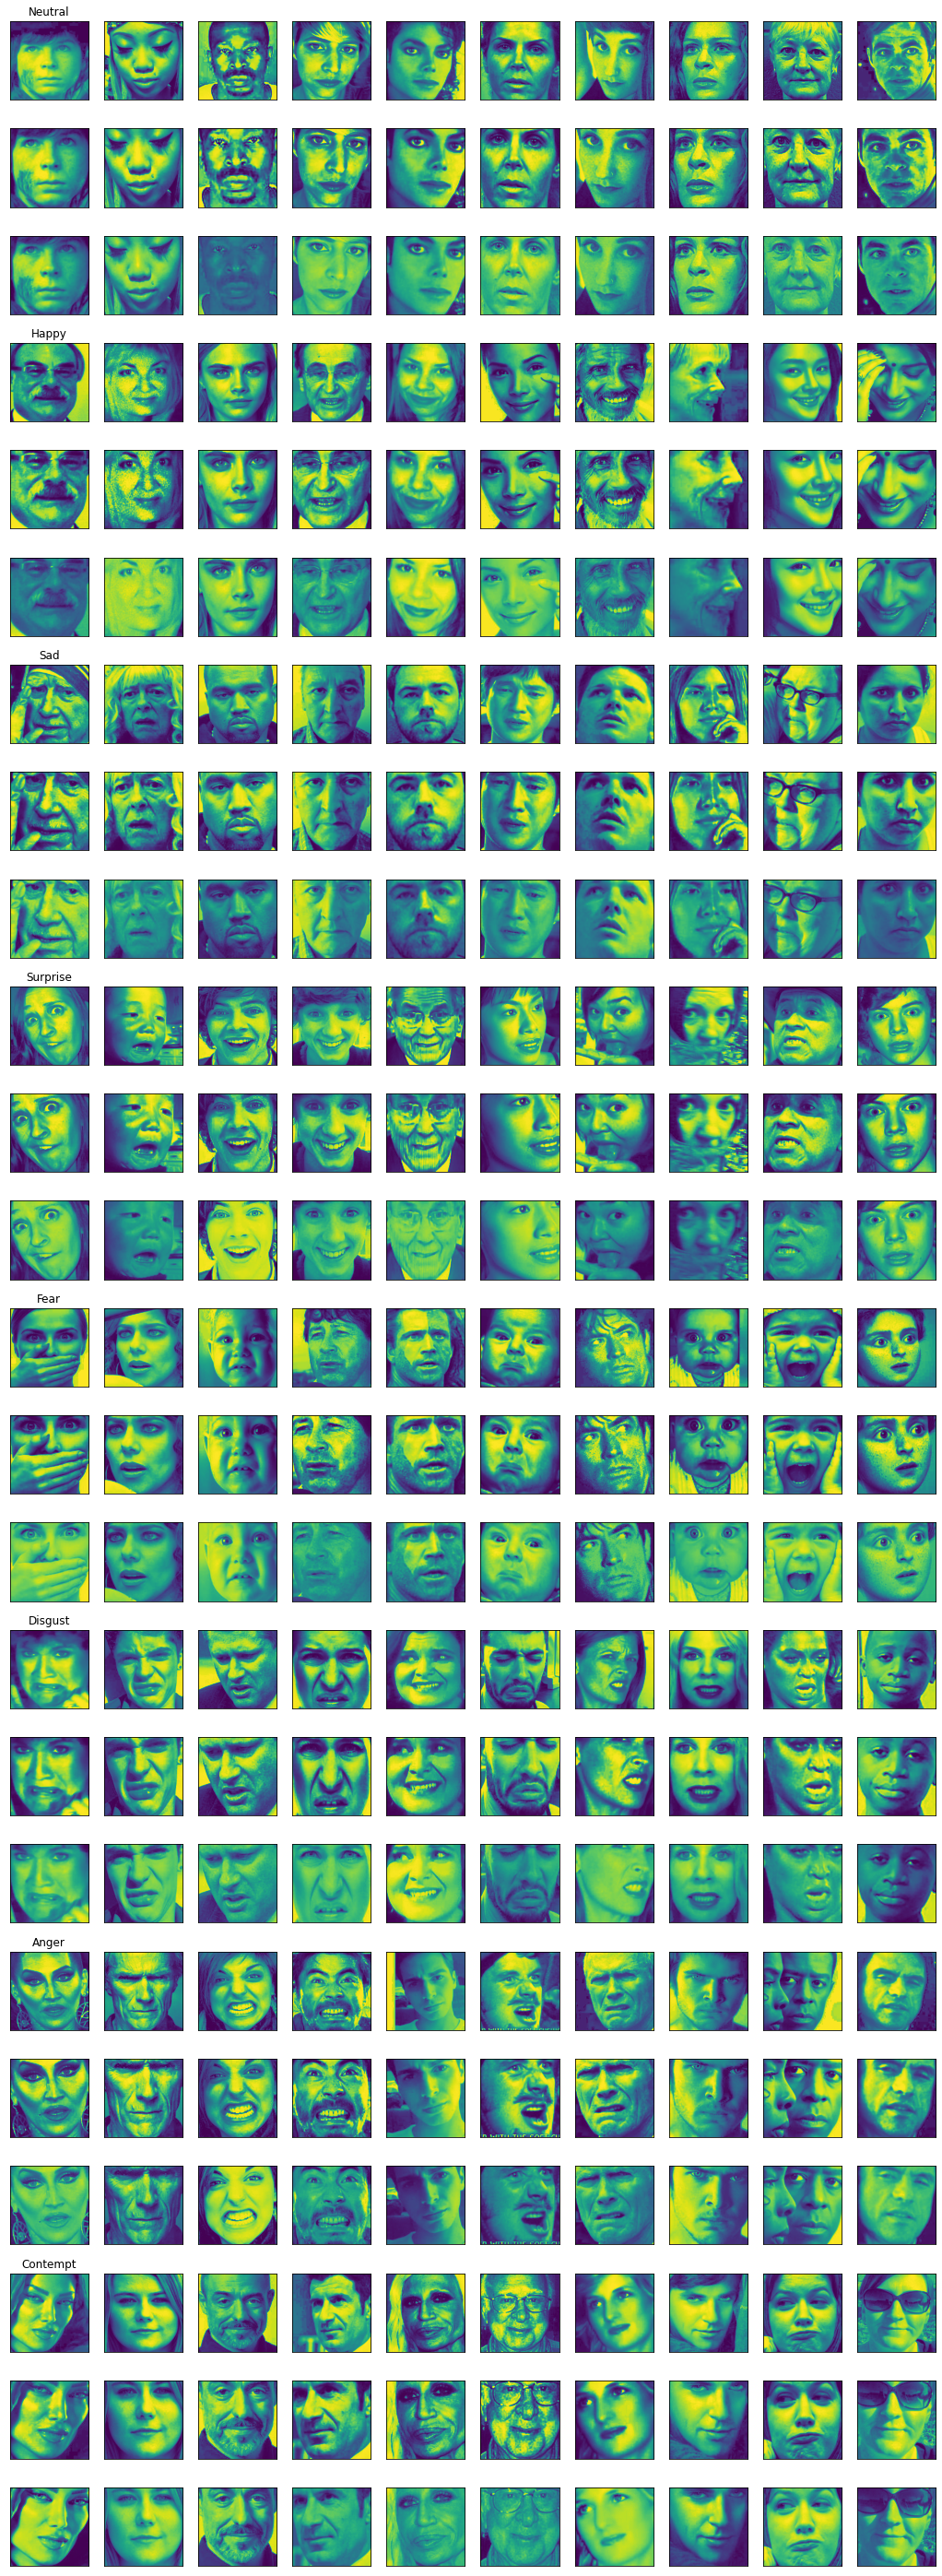

In [58]:
examplesNumber = 10
fig, axis = plt.subplots(labels*3,examplesNumber,figsize=(18,5.5*labels))
fig.subplots_adjust(top=1)

# Foreach label, output 10 random images
for i in range(0, labels*3, 3):
    
    entries_cropped = list(filter(lambda y: '_face' in y, sorted(os.listdir('./data/train_set/processed/' + labelNames[i//3]), key=lambda x:int(x.split('.')[0].split('_')[0]))))
    
    for j in range(0, 10):
        # Show image
        axis[i,j].imshow(X_nocrop[int((m_nocrop/labels)*(i//3)+j),:])
        axis[i+1,j].imshow(X_crop[int((m_crop/labels)*(i//3)+j),:])
        axis[i+2,j].imshow(Image.open('./data/train_set/processed/' + labelNames[i//3] + '/' + entries_cropped[j]).convert('L'))
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        axis[i+1,j].set_xticks([])
        axis[i+1,j].set_yticks([])
        axis[i+2,j].set_xticks([])
        axis[i+2,j].set_yticks([])
        # Display title only on first
        if j==0:
            axis[i,j].set_title(labelNames[i//3])